# Name : Sachin M D

## GRIP @ The Sparks Foundation

### Task 2:

Prediction using Unsupervised ML (K-Means Clustering)

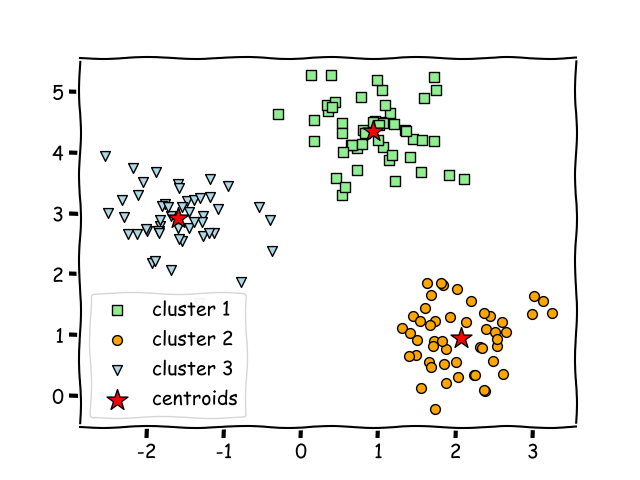


### Problem Statement
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Dataset Name
Iris.csv

### Column Description
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [2]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#reading the values in dataset into X variable
x = iris_data.iloc[:, [0, 1, 2, 3]].values

In [5]:
# running through differnt number of clusters to find a optimal number of clusters
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

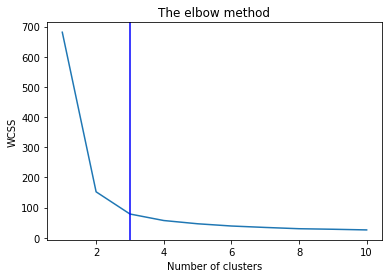

In [6]:
#plotting a elbow plot to determine optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, color = 'blue')
plt.show()

In [7]:
# applying Kmeans on the obtained optimal clusters i.e..., '3'
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(x)

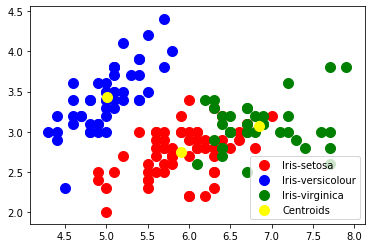

In [8]:
#plotting the different clusters
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# plotting the centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [21]:
len(clusters[clusters==1])

50

In [22]:
len(clusters[clusters==0])

62

In [23]:
len(clusters[clusters==2])

38

In [ ]:
#--------------------------------------------Thank you--------------------------------------------------------------------#